Задание 1

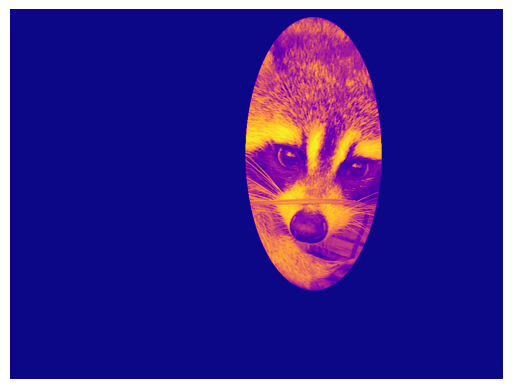

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import datasets

img = datasets.face(gray= True)

sy, sx = img.shape
y, x = np.ogrid[0:sy, 0:sx]

centerx, centery = (630, 300)
mask = (((y - centery)**2) / 80500 + ((x - centerx)**2) / 20000) > 1

img[mask] = 0

plt.imshow(img, cmap= 'plasma')
plt.axis('off')
plt.show()


Задание 2

Средние значения каждого вида: Зайцы - 34080.95238095238 Рыси - 20166.666666666668 Морковь - 42400.0
--------------------------------
STD каждого вида: Зайцы - 20897.906458089667 Рыси - 16254.591536908765 Моркови - 3322.5062255844787
--------------------------------
Лучшие года. Рысь: 1903 Заяц: 1904 Морковь: 1900
--------------------------------
Лучший вид каждого года:
1900 = Морковь
1901 = Морковь
1902 = Рысь
1903 = Рысь
1904 = Кролик
1905 = Кролик
1906 = Морковь
1907 = Морковь
1908 = Морковь
1909 = Морковь
1910 = Морковь
1911 = Морковь
1912 = Рысь
1913 = Рысь
1914 = Рысь
1915 = Кролик
1916 = Морковь
1917 = Морковь
1918 = Морковь
1919 = Морковь
1920 = Морковь
--------------------------------
Годы с популяцией больше 50000:
1902
1903
1904
1912
1913
1914
1915
--------------------------------
Топ 2 худших года для каждого вида:
Рысь - 1917 и 1916
Кролик - 1900 и 1901
Морковь - 1916 и 1903
--------------------------------


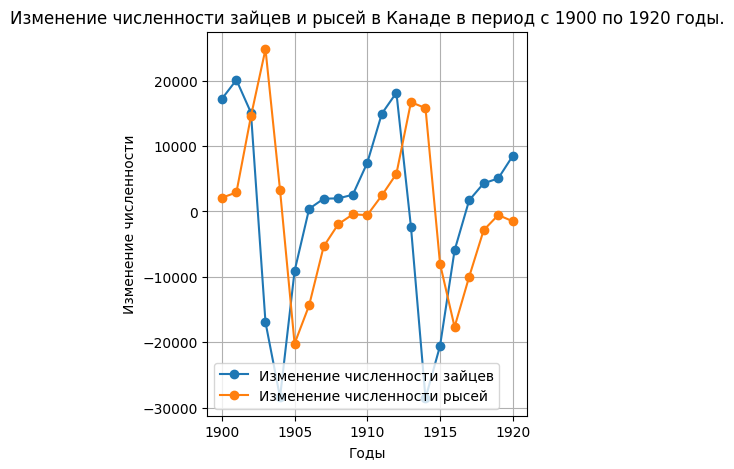

Коэффициент корреляции: -0.05136252586288724


In [ ]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

def PrintMean(populationArray):  
    print("Средние значения каждого вида:", f"Зайцы - {statistics.mean(populationArray[0])}", f"Рыси - {statistics.mean(populationArray[1])}", f"Морковь - {statistics.mean(populationArray[2])}")

def PrintSTD(populationArray):
    print("STD каждого вида:", f"Зайцы - {statistics.pstdev(populationArray[0])}", f"Рыси - {statistics.pstdev(populationArray[1])}", f"Моркови - {statistics.pstdev(populationArray[2])}")

def PrintMaxYearForEachKind(years, populationArray):
    maxIndexes = np.argmax(populationArray, axis= 1)
    print("Лучшие года. Рысь:", int(years[maxIndexes[0]]), "Заяц:", int(years[maxIndexes[1]]), "Морковь:", int(years[maxIndexes[2]]))

def PrintMaxForEachYear(years, populationArray, names):
    maxIndexes = np.argmax(populationArray, axis= 0)
    counter = 0

    print("Лучший вид каждого года:")

    #Да, сдесь использовал for, но чисто чтобы в ручную не вписывать индексы
    for i in years:
        print(f"{int(i)} = {names[maxIndexes[counter]]}")
        counter += 1

def PrintYearsWithPopulationMoreThan5000(years, populationArray):
    buffer = np.empty(populationArray.shape[1], dtype=bool)

    np.any(populationArray > 50000, axis= 0, out= buffer)

    counter = -1

    print("Годы с популяцией больше 50000:")
    
    for i in buffer:
        counter += 1

        if i == False:
            continue

        print(int(years[counter]))

def PrintWorstYears(populationArray, years, names):
    sorted = np.argsort(populationArray, axis= 1)

    counter = 0

    print("Топ 2 худших года для каждого вида:")

    for i in names:
        print(f"{i} - {int(years[sorted[counter][0]])} и {int(years[sorted[counter][1]])}")
        counter += 1

def ShowGradient(years, hares, lynxes):
    hGradient = np.gradient(hares)
    lGradient = np.gradient(lynxes)

    plt.axes([0.2, 0.1, 0.5, 0.8]) 

    plt.plot(years, hGradient, label='Изменение численности зайцев', marker='o')
    plt.plot(years, lGradient, label='Изменение численности рысей', marker='o')

    plt.title('Изменение численности зайцев и рысей в Канаде в период с 1900 по 1920 годы.')
    plt.xlabel('Годы')
    plt.ylabel('Изменение численности')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Коэффициент корреляции: {np.corrcoef(hGradient, lGradient)[0, 1]}")


data = np.loadtxt('Canada.txt')
years = data.T[0]
names = ["Рысь", "Кролик", "Морковь"]

populationArray = np.vstack((data.T[1], data.T[2], data.T[3]))

PrintMean(populationArray)
print("--------------------------------")
PrintSTD(populationArray)
print("--------------------------------")
PrintMaxYearForEachKind(years, populationArray)
print("--------------------------------")
PrintMaxForEachYear(years, populationArray, names)
print("--------------------------------")
PrintYearsWithPopulationMoreThan5000(years, populationArray)
print("--------------------------------")
PrintWorstYears(populationArray, years, names)
print("--------------------------------")
ShowGradient(years, populationArray[0], populationArray[1])

Задание 3

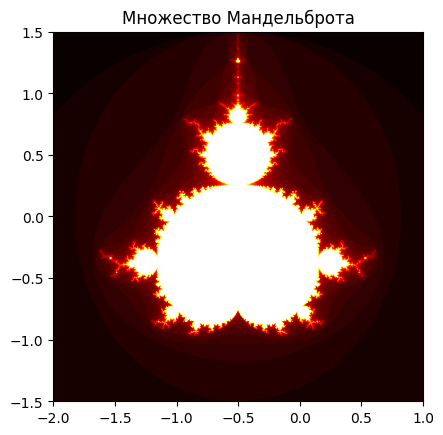

In [2]:
import numpy as np
import matplotlib.pyplot as plt

width, height = 800, 800
xMin, xMax = -2.0, 1.0
yMin, yMax = -1.5, 1.5

# Создаем сетку комплексных чисел
x = np.linspace(xMin, xMax, width)
y = np.linspace(yMin, yMax, height)
C = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
C = C[:, 0] + 1j * C[:, 1]


z = np.zeros(C.shape, dtype=np.complex128)
mask = np.ones(C.shape, dtype=bool)

max_iter = 50
output = np.zeros(C.shape, dtype=int)

for i in range(max_iter):
    mask = mask & (np.abs(z) <= 2.0)

    output[mask] = i

    z[mask] = z[mask]**2 + C[mask]

# Рисуем результат
plt.imshow(output.reshape((height, width)), extent=(xMin, xMax, yMin, yMax), cmap='hot')
plt.title("Множество Мандельброта")
plt.savefig('mandelbrot.png')
